# Predicting Car Purchase Decision with Classification

In this notebook, I will be predicting whether the customer would purchase the car or not based on provided features.

The following dataset is from Kaggle: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset

## Import Libraries and Load Dataset

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('car_data.csv')

## Exploratory Data Analysis

In [11]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [12]:
# what are the variables of the dataset?
print('Column Information:')
for cols in df.columns:
    if cols != 'Purchased':
        print('column name: {}'.format(str(cols)))
    else:
        print('column name: {} (no = 0, yes = 1)'.format(str(cols)))

Column Information:
column name: User ID
column name: Gender
column name: Age
column name: AnnualSalary
column name: Purchased (no = 0, yes = 1)


In [13]:
# what are some general information about the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [14]:
# what are statistical information about numerical variables in the dataset?
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


### Observations
1. There are no missing values in the dataset
2. **User ID** column does not seem to help the model
3. **Age** and **AnnualSalary** columns' mean and median values are similiar, so distribution may be normal.
4. **AnnualSalary** column needs feature scaling.
5. **Gender** column needs to be changed into binary features.

### drop insignificant variables

In [15]:
# drop User ID column
df.drop(columns=['User ID'], inplace=True)
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


### Data Visualization

Text(0.5, 1.0, 'Purchased')

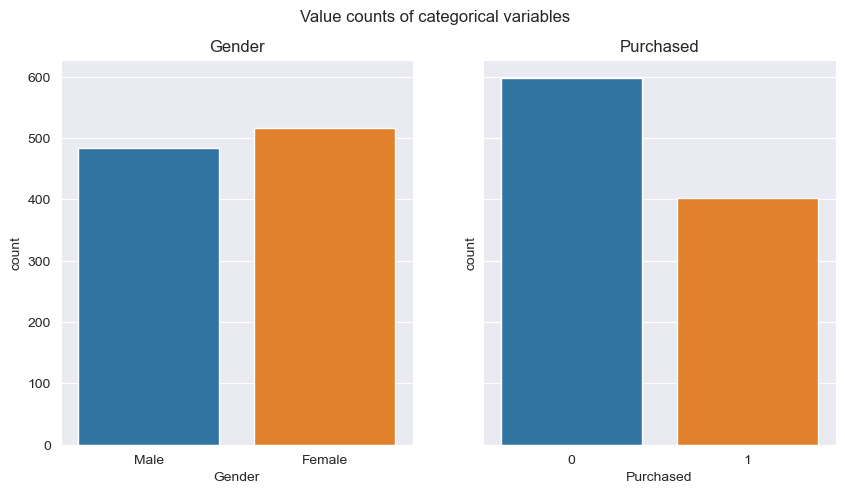

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('Value counts of categorical variables')

sns.countplot(ax=axes[0], data=df, x = 'Gender')
sns.countplot(ax=axes[1], data=df, x = 'Purchased')
axes[0].set_title('Gender')
axes[1].set_title('Purchased')

<AxesSubplot: xlabel='Purchased', ylabel='count'>

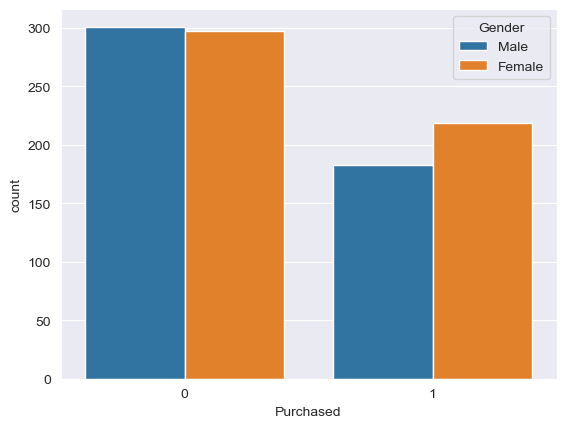

In [18]:
sns.countplot(data=df, x='Purchased', hue='Gender')

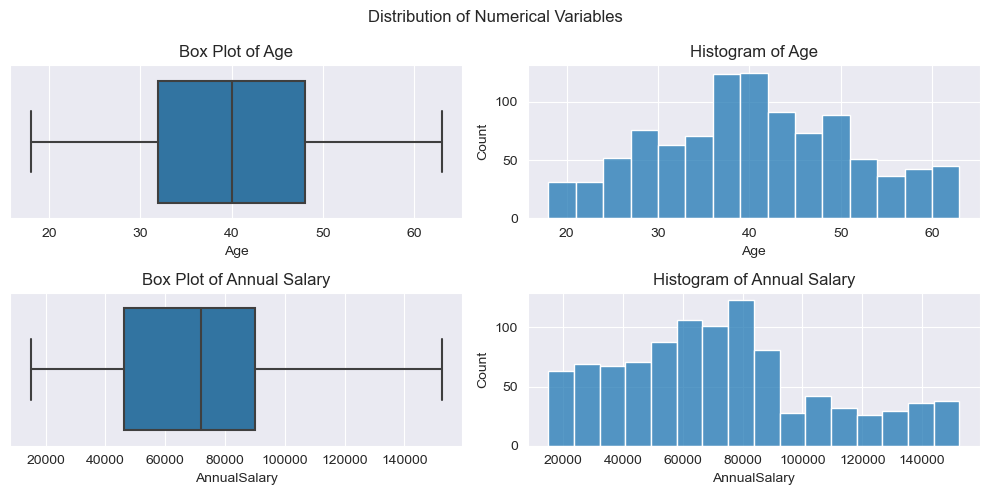

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 5))
fig.suptitle('Distribution of Numerical Variables')
ax[0, 0].set_title('Box Plot of Age')
ax[0, 1].set_title('Histogram of Age')
ax[1, 0].set_title('Box Plot of Annual Salary')
ax[1, 1].set_title('Histogram of Annual Salary')

sns.boxplot(data=df, x='Age', ax=ax[0, 0])
sns.boxplot(data=df, x='AnnualSalary', ax=ax[1, 0])
sns.histplot(data=df, x='Age', ax=ax[0, 1])
sns.histplot(data=df, x='AnnualSalary', ax=ax[1, 1])
fig.tight_layout()

<AxesSubplot: xlabel='Age', ylabel='AnnualSalary'>

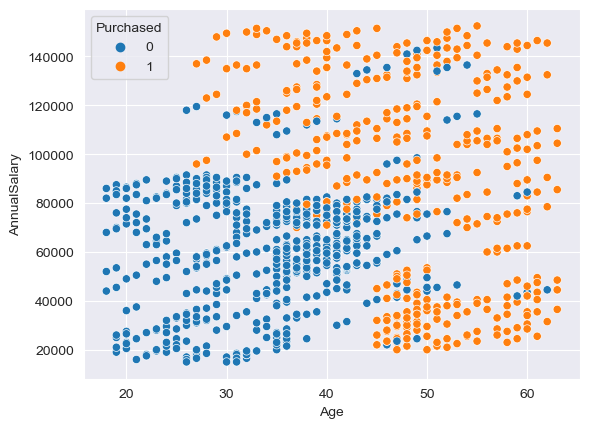

In [21]:
sns.scatterplot(data = df, x = 'Age', y = 'AnnualSalary', hue = 'Purchased')

#### Observation
1. More female customers purchased the car
2. Age has approximate Normal distribution
3. Annual Salary is slightly skewed
4. Older and greater the annual salary is for a customer, there is high chance of purchasing the car.

## Data Preprocessing

### create dummy variables

### set independent and dependent variables

## Model Building

## Visualization

## Validation

## Conclusion